1. Kurang, Pendekatan sederhana berbasis keyword matching.
2. Melakukan test inputan berdasarkan teks
3. Labeling setelah preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow

from IPython import get_ipython
from IPython.display import display
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Libraries untuk preprocessing
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Libraries untuk modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Neural Network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import nltk

# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

1.Load

In [137]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Read each CSV file and store the resulting DataFrames in lists
data_darat_list = [
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/J.257(1jan-30desember2011)N.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/L.175(14-01-01s.d.14-12-31).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/Q.766(1agustus-1desember2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/A.913(1jan-30desember2013)N.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/C.1007(1juni-30desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/D.1000(1jan-30desember2009)N.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/E.1013(1juni-30desember2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/F.347(1maret-1april2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/G.283(01januari-01februari2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/H.275(01februari-1maret2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/I.222(1januari -12desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/K.183(10-01-01s.d.14-12-31).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/M.121(1januari-31desember2013).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/N.108(1juni-30desember2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/O. 733(1 januari-1 april2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/P.1009(1april-1agustus)2015.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Darat/DARAT 2021-2024.csv")
]

data_laut_list = [
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/H.609(1mei-30desember2017).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/D.198(1agustusi11-3desember2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/C.2096(1agustusi11-30desember2011)kapal_laut.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/A.821(1mei-30desember2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/B.1000(1mei-30desember2010).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/D.198(1agustusi11-3desember2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/E.1191(1mei-30desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/F.1005(1januari-1maret2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/G.1012(1maret-1juni2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/I.800(1mei-30desember2018).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/laut/Laut 2021-2024.csv"),
]

data_udara_list = [
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/I.414(1maret-1juni2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/E.1015(1juli11-30september2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/A.38(1januari-30mei2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/B.43(1januari-30mei2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/C.1011(1juni-30desember2009).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/D.1044(1mei-30desember2010).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/F.592(1januari11-30julis2011).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/G.1506(1mei-30desember2012).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/H.397(1julidesember2014).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/J.933(1januari-1maret2015).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/K.727(1januari-30mei2016).csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/O.Udara1.csv"),
    pd.read_csv("/content/drive/Shareddrives/UAS BGDTMG data Source/Udara/Udara 2021-2024.csv")
]
# Gabungkan semua data
data_combined = pd.concat(data_darat_list + data_laut_list + data_udara_list, ignore_index=True)
print(f"✓ Dataset berhasil digabungkan: {len(data_combined)} baris data")
print(f"✓ Kolom yang tersedia: {list(data_combined.columns)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Dataset berhasil digabungkan: 51054 baris data
✓ Kolom yang tersedia: ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username', 'Source.Name']


In [138]:
# ========================================
# 1. DATA PREPROCESSING
# ========================================
# Tentukan kolom teks yang akan digunakan
# Sesuaikan dengan nama kolom di dataset Anda
TEXT_COLUMN = 'full_text'
# Definisikan path kamus stopword
kamus_file_path = '/content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt'
slang_file_path = '/content/drive/Shareddrives/UAS BGDTMG data Source/slang.csv'

def preprocess_text(text):
    """
    Fungsi untuk preprocessing teks
    """
    if pd.isna(text):
        return ""
    # Convert to string jika bukan
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Hapus mention dan hashtag (@username)
    text = re.sub(r'@\w+|#\w+\brt\b', '', text)
    # Remove HTML entities
    text = re.sub(r'&\w+;', '', text)
    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def load_custom_stopwords(kamus_path, slang_path):

    #Memuat daftar stopwords dari file eksternal (kamus.txt dan slang.csv).

    print("Memuat custom stopwords dari file...")

    # 1. Muat stopwords dasar (kata-kata umum non-bahasa Indonesia)
    generic_stopwords = set([
        'rt', 'via', 'the', 'of', 'to', 'and', 'a', 'in', 'is', 'it', 'you', 'that',
        'wkwk', 'hehe', 'haha', 'xixi', 'guys', 'gaes', 'lol', 'yeah', 'again'
    ])

    # 2. Muat dari kamus.txt
    try:
        with open(kamus_path, 'r', encoding='utf-8') as f:
            kamus_stopwords = {line.strip() for line in f}
        print(f"Berhasil memuat {len(kamus_stopwords)} kata dari {kamus_path}")
    except Exception as e:
        print(f"Gagal memuat {kamus_path}: {e}")
        kamus_stopwords = set()

    # 3. Muat dari slang.csv
    try:
        slang_df = pd.read_csv(slang_path)
        # Asumsi kolom pertama berisi kata-kata slang yang akan dijadikan stopword
        # Jika nama kolomnya berbeda, sesuaikan 'slang_df.columns[0]'
        slang_stopwords = set(slang_df[slang_df.columns[0]].astype(str).tolist())
        print(f"Berhasil memuat {len(slang_stopwords)} kata dari {slang_path}")
    except Exception as e:
        print(f"Gagal memuat {slang_path}: {e}")
        slang_stopwords = set()

    # 4. Gabungkan semua stopwords dan hapus duplikasi
    combined_stopwords = generic_stopwords.union(kamus_stopwords).union(slang_stopwords)
    print(f"Total stopwords yang unik: {len(combined_stopwords)}")
    return combined_stopwords

# Panggil fungsi untuk memuat stopwords
# Blok 'indonesian_stopwords' yang panjang sekarang digantikan oleh baris ini
#indonesian_stopwords = load_custom_stopwords(kamus_file_path, slang_file_path)

def remove_stopwords_indonesian(text, stopwords_set):
    #Menghapus stopwords Indonesia dan kata-kata pendek (< 3 karakter).
    if not text:
        return ""
    words = text.split()
    filtered_words = [word for word in words
                      if word not in stopwords_set and len(word) > 2]
    return ' '.join(filtered_words)

def data_preprocessing_pipeline(df, text_column):
    print("\nMemulai preprocessing data dengan custom stopwords...")

    # Load stopwords
    stopwords = load_custom_stopwords(kamus_file_path, slang_file_path)

    df_processed = df.copy()

    print("Menangani missing values...")
    df_processed[text_column] = df_processed[text_column].fillna('')

    print("Membersihkan teks...")
    df_processed['text_cleaned'] = df_processed[text_column].apply(preprocess_text)

    print("Menghapus stopwords...")
    df_processed['text_processed'] = df_processed['text_cleaned'].apply(
        lambda x: remove_stopwords_indonesian(x, stopwords)
    )
    # Filter baris yang kosong setelah preprocessing
    df_processed = df_processed[df_processed['text_processed'].str.len() > 0]
    # Filter empty texts
    initial_count = len(df_processed)
    df_processed = df_processed[df_processed['text_processed'].str.len() > 0]
    removed_count = initial_count - len(df_processed)
    if removed_count > 0:
        print(f"Dihapus {removed_count} baris dengan teks kosong setelah preprocessing")
        # Menampilkan  statistics
    df_processed['original_length'] = df_processed[text_column].str.len()
    df_processed['cleaned_length'] = df_processed['text_processed'].str.len()
    df_processed['word_count'] = df_processed['text_processed'].str.split().str.len()
    return df_processed

# Jalankan preprocessing dengan stopwords baru
data_processed = data_preprocessing_pipeline(data_combined, TEXT_COLUMN)


# 2. RULE-BASED TEXT CLASSIFICATION & LABELING
# =============================================================================

def create_transport_keywords():
    #Membuat dictionary keyword yang sudah dibersihkan dari duplikasi dan diurutkan.

    transport_keywords = {
        'darat': sorted(list(set([
            'andong', 'angdes', 'angkot', 'angkutan kota', 'angkutan pedesaan', 'bajaj',
            'becak', 'bis', 'bus', 'commuter', 'delman', 'elf', 'gerbong', 'gojek', 'grab',
            'hiace', 'kereta', 'kereta api', 'kereta barang', 'kereta cepat', 'kereta lokal',
            'konvoi', 'krl', 'lrt', 'metro', 'mikrolet', 'minibus', 'mobil', 'mobil pribadi',
            'mobil sewaan', 'monorel', 'motor', 'mrt', 'odong-odong', 'ojek', 'ojol',
            'patwal', 'pickup', 'rental mobil', 'sepeda', 'sepeda listrik', 'shuttle bus',
            'skuter', 'skuter listrik', 'subway', 'taksi', 'taxi', 'touring', 'trailer',
            'transjakarta', 'transway', 'travel', 'trem', 'tronton', 'truk', 'truck', 'vespa',
            'depo kereta', 'flyover', 'garasi', 'garage', 'gerbang tol', 'halte', 'jalan',
            'jalur', 'jalur sepeda', 'jembatan', 'jembatan penyeberangan orang', 'jpo',
            'koridor', 'lampu merah', 'lalu lintas', 'lokomotif', 'macet', 'kemacetan',
            'marka jalan', 'parkir', 'parkiran', 'perlintasan', 'pintu tol', 'pom bensin',
            'pool bus', 'rambu', 'rambu lalu lintas', 'raya', 'rel', 'rest area', 'rute',
            'shelter', 'simpang susun', 'spbu', 'stasiun', 'terminal', 'tol', 'traffic',
            'traffic light', 'trayek', 'trotoar', 'underpass', 'zebra cross',
            'ban bocor', 'berangkat kerja', 'berangkat sekolah', 'berkendara', 'carpooling',
            'driver', 'ganti oli', 'isi bensin', 'jalur darat', 'jalanan lancar', 'jalanan padat',
            'kecelakaan', 'kernet', 'kondektur', 'masinis', 'mengemudi', 'menyetir', 'mogok',
            'mudik darat', 'naik bus', 'naik kereta', 'naik motor', 'naik ojek', 'nebeng',
            'ngebut', 'nyetir', 'pelan-pelan', 'penumpang', 'perjalanan darat', 'perjalanan jauh',
            'perjalanan dekat', 'perjalanan mudik', 'ramai lancar', 'razia', 'servis',
            'supir', 'tilang', 'turun angkot', 'transportasi darat', 'kendaaraan darat', 'angkutan darat'
        ]))),
        'laut': sorted(list(set([
            'asdp', 'boat', 'container', 'cruiser', 'feri', 'ferry', 'getek', 'jet ski',
            'kapal', 'kapal barang', 'kapal cepat', 'kapal feri', 'kapal kargo', 'kapal laut',
            'kapal nelayan', 'kapal patroli', 'kapal penumpang', 'kapal perang', 'kapal pesiar',
            'kapal ro-ro', 'kapal roro', 'kapal selam', 'kapal tanker', 'kapal tunda',
            'kargo', 'katamaran', 'kontainer', 'nelayan', 'pelni', 'perahu', 'perahu motor',
            'pinisi', 'rakit', 'sampan', 'speedboat', 'tanker', 'tongkang', 'tugboat', 'yacht',
            'area sandar', 'bea cukai', 'danau', 'dermaga', 'dok', 'galangan kapal',
            'gudang pelabuhan', 'jalur pelayaran', 'laut', 'marina', 'menara suar',
            'mercusuar', 'muara', 'navigasi', 'pantai', 'pelabuhan', 'pemecah gelombang',
            'perairan', 'samudra', 'selat', 'sungai besar', 'syahbandar', 'tanjung', 'teluk',
            'abk', 'aktivitas pelayaran', 'awak kapal', 'badai', 'berlabuh', 'berlayar',
            'berperahu', 'jalur laut', 'kapten kapal', 'kelasi', 'mabuk laut', 'melaut',
            'menyeberang', 'mudik laut', 'naik ferry', 'naik kapal', 'naik perahu', 'nahkoda',
            'ombak', 'pelayaran', 'penyeberangan', 'penyeberangan laut', 'perjalanan laut',
            'shipping', 'terdampar', 'transportasi laut', 'tur kapal pesiar', 'tur laut'
        ]))),
        'udara': sorted(list(set([
            'airasia', 'airbus', 'aircraft', 'airplane', 'atr', 'balon udara', 'batik air',
            'boeing', 'cessna', 'citilink', 'drone', 'garuda', 'garuda indonesia', 'glider',
            'helikopter', 'helicopter', 'jet', 'jet komersial', 'jet pribadi', 'lion air',
            'maskapai', 'pelita air', 'pesawat', 'pesawat carter', 'pesawat charter',
            'pesawat komersial', 'pesawat perintis', 'pesawat pribadi', 'pesawat ringan',
            'pesawat tempur', 'plane', 'skytruck', 'sriwijaya', 'super air jet', 'transnusa',
            'uav', 'wings air', 'air traffic control', 'airport', 'apron', 'area bagasi',
            'area kedatangan', 'area keberangkatan', 'baggage claim', 'bandara', 'bandar udara',
            'boarding gate', 'check-in counter', 'control tower', 'garbarata', 'gate',
            'gerbang', 'halim', 'hangar', 'imigrasi', 'jet bridge', 'juanda', 'kualanamu',
            'landasan pacu', 'lounge', 'menara atc', 'menara pengawas', 'ngurah rai', 'runway',
            'soekarno hatta', 'taxiway', 'terminal', 'terminal domestik', 'terminal internasional',
            'terminal udara', 'awak kabin', 'bagasi', 'bagasi kabin', 'bagasi terdaftar',
            'boarding', 'boarding pass', 'cabin crew', 'check in', 'delay', 'dibatalkan',
            'ditunda', 'flight', 'flight schedule', 'gagal terbang', 'ground handling',
            'jalur udara', 'ketinggian jelajah', 'kopilot', 'landing', 'lepas landas',
            'mendarat', 'mudik udara', 'naik pesawat', 'nomor penerbangan', 'penerbangan',
            'penerbangan malam', 'perjalanan udara', 'pilot', 'pramugara', 'pramugari',
            'take off', 'terbang', 'tiket pesawat', 'transit', 'turbulensi', 'turun pesawat', 'transportasi udara'
        ])))
    }
    return transport_keywords

def classify_transport_type(text, keywords_dict, threshold=1):
    #Fungsi klasifikasi yang direvisi untuk menangani ambiguitas.
    #Mengidentifikasi teks dengan beberapa moda transportasi.
    #Menerapkan ambang batas skor minimal.
    if not text:
        return 'tidak_teridentifikasi'
    text_lower = text.lower()
    scores = {}
    # Hitung skor untuk setiap kategori
    for transport_type, keywords in keywords_dict.items():
        score = sum(1 for keyword in keywords if keyword in text_lower)
        scores[transport_type] = score
    # Hitung berapa banyak kategori yang memiliki skor di atas 0
    kategori_ditemukan = [s for s in scores.values() if s > 0]
    # 1. LOGIKA UTAMA: Jika lebih dari satu kategori ditemukan, labeli sebagai ambigu
    if len(kategori_ditemukan) > 1:
        return 'tidak_teridentifikasi'  # atau 'multi_moda' jika Anda ingin label khusus
    # 2. Ambil skor tertinggi
    max_score = max(scores.values())
    # 3. Terapkan threshold. Hanya labeli jika skornya cukup signifikan.
    if max_score >= threshold:
        return max(scores, key=scores.get)
    else:
        # Jika tidak ada kategori yang ditemukan atau skor tidak mencapai threshold
        return 'tidak_teridentifikasi'

def apply_labeling(df, text_column='text_cleaned'):
    keywords = create_transport_keywords()
    # Gunakan fungsi yang sudah direvisi
    # Anda bisa mengatur threshold di sini, misalnya 2 jika ingin minimal 2 keyword
    df['transport_label'] = df[text_column].apply(
        lambda x: classify_transport_type(x, keywords, threshold=1)
    )

    label_counts = df['transport_label'].value_counts()
    print("Distribusi label:")
    for label, count in label_counts.items():
        print(f"  {label}: {count} ({count/len(df)*100:.1f}%)")
    return df

#MEnyimpan label?
data_labeled = apply_labeling(data_processed, 'text_processed')


Memulai preprocessing data dengan custom stopwords...
Memuat custom stopwords dari file...
Berhasil memuat 1083 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/kamus.txt
Berhasil memuat 1480 kata dari /content/drive/Shareddrives/UAS BGDTMG data Source/slang.csv
Total stopwords yang unik: 2450
Menangani missing values...
Membersihkan teks...
Menghapus stopwords...
Distribusi label:
  tidak_teridentifikasi: 13595 (26.6%)
  laut: 13111 (25.7%)
  udara: 12455 (24.4%)
  darat: 11884 (23.3%)


**Model kami berhasil mengatasi teks ambigu yang menyebutkan 3 label sekaligus dalam satu teks**

In [139]:
# 3. EKSEKUSI PIPELINE
# ========================================

def run_full_pipeline(data_combined, text_column):

    #Menjalankan seluruh pipeline preprocessing dan labeling

    print("="*60)
    print("MEMULAI PIPELINE PREPROCESSING DAN LABELING")
    print("="*60)

    # Step 1: Preprocessing
    data_processed = data_preprocessing_pipeline(data_combined, text_column)

    # Step 2: Labeling
    data_labeled = apply_labeling(data_processed, 'text_cleaned')

    # Step 3: Tampilkan hasil
    print(f"\n{'='*60}")
    print("HASIL AKHIR PIPELINE:")
    print(f"{'='*60}")
    print(f"Data awal: {len(data_combined):,} baris")
    print(f"Data setelah preprocessing: {len(data_processed):,} baris")
    print(f"Data setelah labeling: {len(data_labeled):,} baris")
    print(f"Rata-rata panjang teks original: {data_labeled['original_length'].mean():.1f} karakter")
    print(f"Rata-rata panjang teks cleaned: {data_labeled['cleaned_length'].mean():.1f} karakter")
    print(f"Rata-rata jumlah kata: {data_labeled['word_count'].mean():.1f} kata")

    return data_labeled

In [140]:
print("\n\nKolom pada Dataset Setelah Preprocessing dan Labeling:")
data_labeled.columns



Kolom pada Dataset Setelah Preprocessing dan Labeling:


Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'Source.Name', 'text_cleaned',
       'text_processed', 'original_length', 'cleaned_length', 'word_count',
       'transport_label'],
      dtype='object')

In [141]:
# 3. EXPLORATORY DATA ANALYSIS (EDA)

print("\n\n3. EXPLORATORY DATA ANALYSIS")
print("-"*50)

plt.style.use('default')
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Analisis Eksploratif Data Teks Transportasi', fontsize=18, fontweight='bold')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

sns.boxplot(data=data_labeled, x='transport_label', y='cleaned_length', ax=axes[0], palette=colors)
axes[0].set_title('1. Distribusi Panjang Teks per Label', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label Transportasi')
axes[0].set_ylabel('Panjang Karakter (Setelah Preprocessing)')

sns.histplot(data=data_labeled, x='word_count', hue='transport_label', multiple="stack", ax=axes[1], bins=25, palette=colors)
axes[1].set_title('2. Distribusi Jumlah Kata per Label', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jumlah Kata (Setelah Preprocessing)')
axes[1].set_ylabel('Jumlah Tweet')

avg_length = data_labeled.groupby('transport_label')['cleaned_length'].mean().sort_values(ascending=False)
sns.barplot(x=avg_length.index, y=avg_length.values, ax=axes[2], palette=colors)
axes[2].set_title('3. Rata-rata Panjang Teks per Kategori', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Label Transportasi')
axes[2].set_ylabel('Rata-rata Panjang Karakter')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()



3. EXPLORATORY DATA ANALYSIS
--------------------------------------------------


In [142]:
# Tampilkan contoh hasil preprocessing per label
print("\nSampel hasil preprocessing per Label:")
labels = data_labeled['transport_label'].unique()

for label in labels:
    print(f"\n--- Sampel Label: {label} ---")
    label_data = data_labeled[data_labeled['transport_label'] == label].head(30)

    if not label_data.empty:
        for index, row in label_data.iterrows():
            print(f"\nOriginal: {row['full_text']}")
            print(f"Cleaned:  {row['text_processed']}")
            print(f"Label:    {row['transport_label']}")
    else:
        print(f"Tidak ada data untuk label {label} setelah preprocessing.")


Sampel hasil preprocessing per Label:

--- Sampel Label: darat ---

Original: @hitsugayaani @milfrisi @aulianindia @titawrrrrr persis kenek bus antarkota jakarta-bandung yg ada di kampung rambutan ni wakakaka~
Cleaned:  persis kenek bus antarkota jakartabandung kampung rambutan wakakaka
Label:    darat

Original: Cintamu itu ibarat Bus antarkota dalam provinsi. Jauh/dekat tarif tetap sama!
Cleaned:  cintamu ibarat bus antarkota jauhdekat
Label:    darat

Original: Kondektur Palsu Marak di Bus Antarkota http://t.co/JWOS6RZy #newsSMG
Cleaned:  kondektur palsu marak bus antarkota newssmg
Label:    darat

Original: Sunyalangu News .... Kondektur Gadungan Marak di Bus Antarkota: SEMARANG http://t.co/unZIqBQJ http://t.co/YW9X7sH5
Cleaned:  sunyalangu kondektur gadungan marak bus antarkota semarang
Label:    darat

Original: Jabatanku naik di supir kopaja :D RT @astri_ayeaye: hati2 ya @nuriTOFIK RT @suaramerdeka: Kondektur Gadungan Marak di Bus Antarkota
Cleaned:  jabatanku supir kopaja hati


Analisis Kata Teratas per Kategori (dari teks yang sudah bersih):

=== TOP WORDS - TRANSPORTASI TIDAK_TERIDENTIFIKASI ===



=== TOP WORDS - TRANSPORTASI DARAT ===


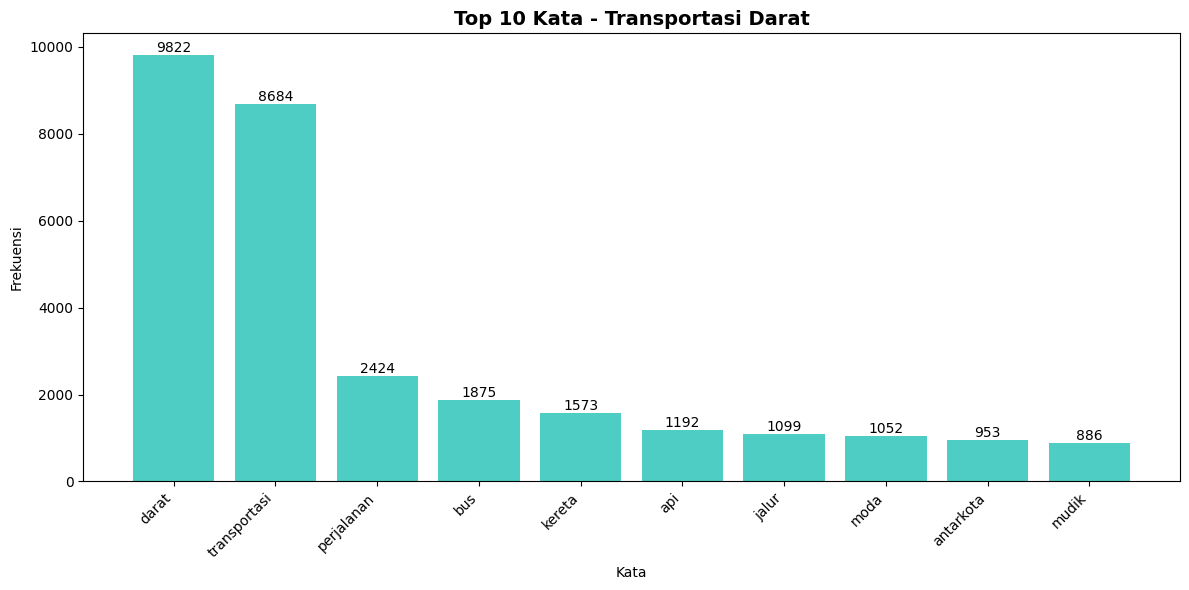


=== TOP WORDS - TRANSPORTASI LAUT ===



=== TOP WORDS - TRANSPORTASI UDARA ===


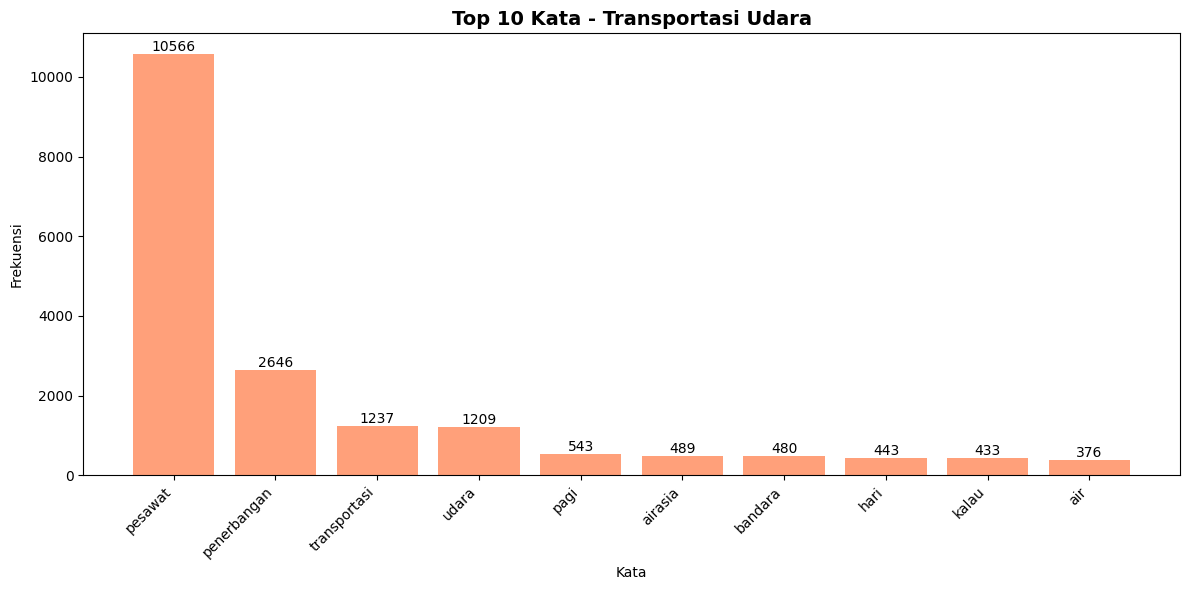

In [129]:
# Analisis kata-kata paling sering muncul per kategori
def get_top_words(texts, n=10):
    "Mendapatkan kata-kata teratas dari kumpulan teks"
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(n)

print("\nAnalisis Kata Teratas per Kategori (dari teks yang sudah bersih):")
categories = data_labeled['transport_label'].unique()

for i, category in enumerate(categories):
    print(f"\n=== TOP WORDS - TRANSPORTASI {category.upper()} ===")

    # --- BAGIAN YANG DIREVISI 2 ---
    # Mengambil data dari kolom 'text_processed' yang sudah bebas stopwords
    category_texts = data_labeled[data_labeled['transport_label'] == category]['text_processed']

    if not category_texts.empty:
        top_words = get_top_words(category_texts, 15)
        if top_words:
            words, counts = zip(*top_words[:10])
            plt.figure(figsize=(12, 6))
            bars = plt.bar(words, counts, color=colors[i % len(colors)])
            plt.title(f'Top 10 Kata - Transportasi {category.replace("_", " ").title()}', fontsize=14, fontweight='bold')
            plt.xlabel('Kata')
            plt.ylabel('Frekuensi')
            plt.xticks(rotation=45, ha='right')
            for bar, count in zip(bars, counts):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=10)
            plt.tight_layout()
            plt.show()

In [130]:
# Statistik deskriptif
stats_df = data_labeled.groupby('transport_label').agg({
    'cleaned_length': ['mean', 'std', 'min', 'max'],
    'word_count': ['mean', 'std', 'min', 'max']
}).round(2)
print("\n\nStatistik Deskriptif Panjang Teks dan Jumlah Kata per Label:")
print(stats_df)



Statistik Deskriptif Panjang Teks dan Jumlah Kata per Label:
                      cleaned_length                 word_count              
                                mean    std min  max       mean   std min max
transport_label                                                              
darat                          81.78  44.04   3  241      10.35  5.36   1  31
laut                           62.01  45.29   5  239       8.47  5.53   1  36
tidak_teridentifikasi          93.40  49.75   4  271      12.15  6.16   1  35
udara                          54.95  34.75   7  219       7.43  4.64   1  30


In [ ]:
# 4. EKSTRAKSI FITUR

print("\n\n4. FEATURE EXTRACTION")
print("-"*50)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Pembatasan fitur untuk efisiensi
    min_df=2,           # Kata harus muncul minimal 2 kali
    max_df=0.8,         # Maksimal 80% dokumen
    ngram_range=(1, 2), # Unigram dan bigram
    sublinear_tf=True   # Gunakan log scaling
)

# Fit dan transform
X_tfidf = tfidf_vectorizer.fit_transform(data_labeled['text_processed'])
y = data_labeled['transport_label']

print(f"Shape fitur TF-IDF: {X_tfidf.shape}")
print(f"Jumlah fitur: {X_tfidf.shape[1]}")
print(f"Jumlah sampel: {X_tfidf.shape[0]}")

# Tampilkan beberapa fitur teratas
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nContoh 10 fitur pertama: {feature_names[:10]}")

# Label encoding untuk neural networks
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Label classes: {label_encoder.classes_}")

# Split data untuk model tradisional
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train_tfidf.shape[0]} samples")
print(f"Test set: {X_test_tfidf.shape[0]} samples")

# Split data untuk neural networks (text sequences)
train_texts, test_texts, y_train_nn, y_test_nn = train_test_split(
    data_labeled['text_processed'], y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train_tfidf.shape[0]} samples")
print(f"Test set: {X_test_tfidf.shape[0]} samples")

# Tampilkan distribusi di train dan test set
print(f"\nDistribusi Training Set:")
train_dist = pd.Series(y_train).value_counts()
for label, count in train_dist.items():
    print(f"- {label}: {count}")

print(f"\nDistribusi Test Set:")
test_dist = pd.Series(y_test).value_counts()
for label, count in test_dist.items():
    print(f"- {label}: {count}")


Mengapa Naive Bayes dan Logistic Regression direkomendasikan?
1. Multinomial Naive Bayes
Dibuat khusus untuk data teks: Naive Bayes (Multinomial) bekerja sangat baik pada data berbasis frekuensi seperti TF-IDF atau Bag of Words.

Kecepatan dan efisiensi: Sangat cepat dilatih, cocok untuk jumlah data yang besar seperti 20K+ tweet.

Baseline yang kuat: Memberikan hasil memuaskan pada banyak tugas NLP sederhana.

2. Logistic Regression
Mudah ditafsirkan: Memberikan probabilitas prediksi, membantu memahami pengaruh fitur.

Performa bagus pada TF-IDF: Cocok untuk data sparse dan linier seperti representasi TF-IDF.

Stabil dan cepat: Latihan model cepat, tanpa overfitting ekstrem.

In [81]:
# 5. MODEL DEVELOPMENT - NON-NEURAL NETWORKS
print("\n\n5. MODEL NON-NEURAL NETWORKS")
print("-"*50)

# Dictionary untuk menyimpan hasil
results = {}
predictions = {}

# Tuning Multinomial Naive Bayes
# Tentukan parameter yang akan diuji
params_nb = {
    'alpha': [0.1, 0.5, 0.8, 1.0, 1.2]
}

# Inisialisasi GridSearchCV
grid_nb = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=params_nb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1 # Gunakan semua core CPU yang tersedia
)

# Latih model untuk mencari parameter terbaik
grid_nb.fit(X_train_tfidf, y_train)

# Tampilkan hasil tuning
print(f"\nParameter terbaik untuk Naive Bayes: {grid_nb.best_params_}")
print(f"Skor cross-validation terbaik: {grid_nb.best_score_:.4f}")

# Simpan model terbaik dan lakukan prediksi
nb_model = grid_nb.best_estimator_
nb_pred = nb_model.predict(X_test_tfidf)
predictions['Multinomial Naive Bayes'] = nb_pred



5. MODEL NON-NEURAL NETWORKS
--------------------------------------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [ ]:
# Model 2: Tuning Logistic Regression
params_lr = [
    {
        'solver': ['lbfgs'],
        'multi_class': ['multinomial'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'C': [0.1, 1, 10, 100]
    }
]

# Inisialisasi GridSearchCV
grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=params_lr,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Latih model untuk mencari parameter terbaik
grid_lr.fit(X_train_tfidf, y_train)

# Tampilkan hasil tuning
print(f"\nParameter terbaik untuk Logistic Regression: {grid_lr.best_params_}")
print(f"Skor cross-validation terbaik: {grid_lr.best_score_:.4f}")

# Simpan model terbaik dan lakukan prediksi
lr_model = grid_lr.best_estimator_
lr_pred = lr_model.predict(X_test_tfidf)
predictions['Logistic Regression'] = lr_pred

Model Neural Network
 1. Bidirectional LSTM (BiLSTM) — REKOMENDASI UTAMA
 Kelebihan:
Memahami konteks kata dari dua arah (kiri & kanan)

Sangat baik untuk memahami hubungan antar kata dalam kalimat pendek seperti tweet

Bisa menangani kalimat ambigu yang umum di media sosial

 Arsitektur:
Embedding (Word2Vec/GloVe/FastText atau train sendiri)

Bidirectional LSTM (64–128 units)

Dropout (0.3–0.5)

Dense → Softmax (output untuk 3 kelas)

 Kenapa BiLSTM terbaik?
Punya akurasi tinggi pada teks pendek

Lebih presisi dalam menangani variasi bahasa dan konteks yang umum di media sosial

Tidak terlalu berat seperti Transformer

 2. 1D Convolutional Neural Network (CNN-Text)
 Kelebihan:
Cepat dilatih

Efisien untuk menangkap pola lokal (n-gram)

Sangat cocok untuk teks pendek

 Kapan dipakai?
Jika waktu komputasi terbatas

Untuk baseline cepat dari model neural

In [ ]:
# 6. MODEL DEVELOPMENT - NEURAL NETWORKS

print("\n\n6. MODEL NEURAL NETWORKS")
print("-"*50)
VOCAB_SIZE = 5000
MAX_LENGTH = 60

# Dictionary untuk menyimpan hasil
results = {}
predictions = {}

# Prepare tokenizer for neural networks
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)

# Pad sequences
max_length = 60
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels for neural networks
y_train_encoded = label_encoder.fit_transform(y_train_nn)
y_test_encoded = label_encoder.transform(y_test_nn)

num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)

print(f"Neural network input shape: {X_train_pad.shape}")
print(f"Neural network output shape: {y_train_cat.shape}")
print(f"Number of classes: {num_classes}")

In [ ]:
# --- Definisi Model CNN Eksperimen---
print("Training CNN-1D Best Arsitektur")
from tensorflow.keras.optimizers import AdamW
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=60),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(filters=32, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=AdamW(learning_rate=0.0005, weight_decay=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

# --- Callbacks---
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)

# --- Training Model ---
print("\nMemulai training CNN model...")
cnn_history = cnn_model.fit(
    X_train_pad, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_pad, y_test_cat), # Evaluasi langsung pada test set
    verbose=1,
    callbacks=[
        early_stopping, # Menggunakan objek yang sudah didefinisikan (tidak ada duplikasi)
        reduce_lr
    ]
)

# --- Prediksi ---
cnn_pred_prob = cnn_model.predict(X_test_pad)
cnn_pred_encoded = np.argmax(cnn_pred_prob, axis=1)
predictions['CNN-1D'] = label_encoder.inverse_transform(cnn_pred_encoded)

In [ ]:
# Plot training history untuk CNN-1D
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', color='#FF6B6B')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='#4ECDC4')
plt.title('CNN-1D Model Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss', color='#FF6B6B')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='#4ECDC4')
plt.title('CNN-1D Model Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning curve
plt.subplot(1, 3, 3)
epochs = range(1, len(cnn_history.history['accuracy']) + 1)
plt.plot(epochs, cnn_history.history['accuracy'], 'b-', label='Training Acc')
plt.plot(epochs, cnn_history.history['val_accuracy'], 'r-', label='Validation Acc')
plt.fill_between(epochs, cnn_history.history['accuracy'], alpha=0.3, color='blue')
plt.fill_between(epochs, cnn_history.history['val_accuracy'], alpha=0.3, color='red')
plt.title('CNN-1D Learning Curve', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("Training BiLSTM Best Arsitektur...")

# --- Definisikan Callbacks ---

# Mengurangi learning rate saat performa mandek
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

# Menghentikan training jika tidak ada kemajuan
# Kita beri patience lebih agar memberi kesempatan pada LR baru
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

bilstm_model = Sequential([
    # Embedding layer
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),

    # Bidirectional LSTM layers
    Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, return_sequences=True, kernel_regularizer=l2(0.005))),
    GlobalMaxPooling1D(),

    # Dense layers
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nBidirectional LSTM Model Architecture:")
bilstm_model.summary()

# Train BiLSTM
bilstm_history = bilstm_model.fit(
    X_train_pad, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# BiLSTM Predictions
bilstm_pred_prob = bilstm_model.predict(X_test_pad)
bilstm_pred_encoded = np.argmax(bilstm_pred_prob, axis=1)
bilstm_pred = label_encoder.inverse_transform(bilstm_pred_encoded)
predictions['BiLSTM'] = bilstm_pred

In [ ]:
# Plot training history untuk BiLSTM
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(bilstm_history.history['accuracy'], label='Training Accuracy', color='#FF6B6B')
plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy', color='#4ECDC4')
plt.title('BiLSTM Model Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(bilstm_history.history['loss'], label='Training Loss', color='#FF6B6B')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss', color='#4ECDC4')
plt.title('BiLSTM Model Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Learning curve
plt.subplot(1, 3, 3)
epochs = range(1, len(bilstm_history.history['accuracy']) + 1)
plt.plot(epochs, bilstm_history.history['accuracy'], 'b-', label='Training Acc')
plt.plot(epochs, bilstm_history.history['val_accuracy'], 'r-', label='Validation Acc')
plt.fill_between(epochs, bilstm_history.history['accuracy'], alpha=0.3, color='blue')
plt.fill_between(epochs, bilstm_history.history['val_accuracy'], alpha=0.3, color='red')
plt.title('BiLSTM Learning Curve', fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 7. MODEL EVALUATION

print("\n\n7. EVALUASI MODEL")
print("-"*50)

def evaluate_model(y_true, y_pred, model_name):
    """Evaluasi model dengan berbagai metrik"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"\n{model_name}:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")

    return accuracy, precision, recall, f1

# Evaluate all models
evaluate_model(y_test, predictions['Multinomial Naive Bayes'], 'Multinomial Naive Bayes')
evaluate_model(y_test, predictions['Logistic Regression'], 'Logistic Regression')
evaluate_model(y_test_nn, predictions['CNN-1D'], 'CNN-1D')
evaluate_model(y_test_nn, predictions['BiLSTM'], 'BiLSTM')


In [ ]:
# 8. HASIL KOMPARASI DAN VISUALISASI

print("\n\n8. PERBANDINGAN HASIL")
print("-"*50)

# Create comparison DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("Model Performance Comparison:")
print("="*60)
print(results_df.to_string())

In [ ]:
# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    bars = results_df[metric].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)

    # Tambahkan nilai di atas bar
    for j, (name, value) in enumerate(results_df[metric].items()):
        ax.text(j, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Radar chart untuk perbandingan
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='polar')

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for i, model in enumerate(results_df.index):
    values = results_df.loc[model].tolist()
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Comparison - Radar Chart', size=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 9. DETAILED ANALYSIS

print("\n\n9. ANALISIS DETAIL")
print("-"*50)

# Model terbaik
best_model_name = results_df['Accuracy'].idxmax()
best_accuracy = results_df.loc[best_model_name, 'Accuracy']

print(f"Model terbaik: {best_model_name}")
print(f" Accuracy terbaik: {best_accuracy:.4f}")

# Confusion Matrix untuk model terbaik
best_pred = predictions[best_model_name]

# Adjust y_test untuk model terbaik
if best_model_name in ['BiLSTM', 'CNN-1D','Multinomial Naive Bayes', 'Logistic Regression']:
    y_test_adjusted = y_test_nn
else:
    y_test_adjusted = y_test

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_adjusted, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print(f"\nClassification Report - {best_model_name}:")
print("="*60)
print(classification_report(y_test_adjusted, best_pred))

# Analisis per kelas
print(f"\n Analisis Per Kelas - {best_model_name}:")
print("="*50)
for class_name in label_encoder.classes_:
    class_precision = precision_score(y_test_adjusted, best_pred, labels=[class_name], average=None)[0]
    class_recall = recall_score(y_test_adjusted, best_pred, labels=[class_name], average=None)[0]
    class_f1 = f1_score(y_test_adjusted, best_pred, labels=[class_name], average=None)[0]

    print(f"{class_name}:")
    print(f"  Precision: {class_precision:.4f}")
    print(f"  Recall:    {class_recall:.4f}")
    print(f"  F1-Score:  {class_f1:.4f}")

KESIMPULAN DAN ELABORASI UNTUK DI BAHAS DI LAMPORAN, SETELAH ITU CODE DI HAPUS.

In [ ]:
# 10. KESIMPULAN DAN ELABORASI HASIL

print("\n\n10. KESIMPULAN DAN ELABORASI HASIL")
print("="*60)

print(" KESIMPULAN:")
print(f"1. Dataset berhasil diproses dengan total {len(data_combined)} tweet")
print(f"2. Distribusi data:")
for label, count in data_combined['transport_label'].value_counts().items():
    print(f"   - {label}: {count} tweet ({count/len(data_combined)*100:.1f}%)")
print(f"3. Model terbaik: {best_model_name} dengan accuracy {best_accuracy:.4f}")
print(f"4. Range performa: {results_df['Accuracy'].min():.4f} - {results_df['Accuracy'].max():.4f}")

print(f"\n ELABORASI HASIL:")
print("="*40)

# Analisis mengapa hasil seperti ini
if best_accuracy > 0.8:
    print(" PERFORMA TINGGI (>80%):")
    print("   - Data memiliki karakteristik yang cukup berbeda antar kelas")
    print("   - Preprocessing efektif menghilangkan noise")
    print("   - Feature extraction TF-IDF menangkap pola linguistik dengan baik")
elif best_accuracy > 0.6:
    print("  PERFORMA SEDANG (60-80%):")
    print("   - Ada overlap karakteristik antar kelas transportasi")
    print("   - Beberapa tweet mungkin ambiguous dalam konteks")
    print("   - Ukuran dataset mungkin perlu ditingkatkan")
else:
    print(" PERFORMA RENDAH (<60%):")
    print("   - Dataset mungkin tidak seimbang")
    print("   - Preprocessing perlu perbaikan")


In [ ]:
# prompt: tambahkan penghitungan waktu eksekusi dan simpan kedalam file dan di download

import time
from google.colab import files

# Record the start time
start_time = time.time()


# Record the end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print(f"\nTotal execution time: {execution_time:.2f} seconds")

# Save execution time to a file
output_filename = 'execution_time.txt'
with open(output_filename, 'w') as f:
    f.write(f"Total execution time: {execution_time:.2f} seconds\n")
    f.write(f"\nModel Performance Comparison:\n")
    f.write("="*60 + "\n")
    f.write(results_df.to_string() + "\n")
    f.write(f"\nClassification Report - {best_model_name}:\n")
    f.write("="*60 + "\n")
    f.write(classification_report(y_test_adjusted, best_pred) + "\n")

print(f"Execution time and model evaluation results saved to {output_filename}")

# Download the file
files.download(output_filename)
